# Исследование интернет-магазина компьютерных игр "Стримчик"

Объект исследования - интернет-магазин компьютерных игр "Стримчик".

**Цель исследования** - выявить определяющие успешность игры закономерности. 

    1.Провести исследовательский анализ.
    2.Составить портрет каждого пользователя.
    3.Проверить гипотезы.
 
Ход исследования:

Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы я получу из файла /datasets/games.csv. Данные представлены до 2016 года. 

Для начала проведу предобработку данных, преобразую данные в нужный тип, проверю на наличие пропусков и дубликатов, при необходимости исправлю это. Создам необходимые таблицы / столбцы с расчетами, визуализирую данные с помощью гистограмм.

**ЗАГРУЗКА ДАННЫХ**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


    Поменяем тип данных у года релиза на int, оценки пользователя на float64, в остальных все корректно.


**ПРЕДОБРАБОТКА ДАННЫХ**

In [5]:
data = data.rename(columns=lambda x: x.lower())
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

    Одинаковое количество пропусков в наименовании и жанре, скорее всего это одни и те же строки, так что удалим их.
    Пропуски в оценках скорее всего из-за того,что этим играм еще не дали оценку, трогать их пока не будем.
    Пропуск в категории оставим как есть, так как на дальнейшее исследование это не повлияет.
    

In [7]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


    Действительно, там где не указано наименивание, так же отсутствует жанр - удаляем.

In [8]:
#Проверяем наличие дубликатов
data.duplicated().sum()

0

    Дублиткатов в таблице нет.

In [9]:
data_rows = data[data.duplicated(subset=['name','platform'])]
data_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [10]:
#Удаляем строки с пропусками, преобразовываем тип данных
data.dropna(subset=['name'], inplace=True) 
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')

In [11]:
#Меняем тип данных и заменяем значение в столбце оценки пользователя
data.loc[data['user_score'] == 'tbd'] = np.nan
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

    В столбце оценки пользователя имеется значение 'tbd', заменим его на nan , при этом поменяв тип данных на 'float', чтобы в дальнейшем иметь возможность проводить вычисления с этим столбцом.


In [12]:
#Создаем столбец с общими продажами
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ**

**Исследуем сколько игр выпускалось в разные года**

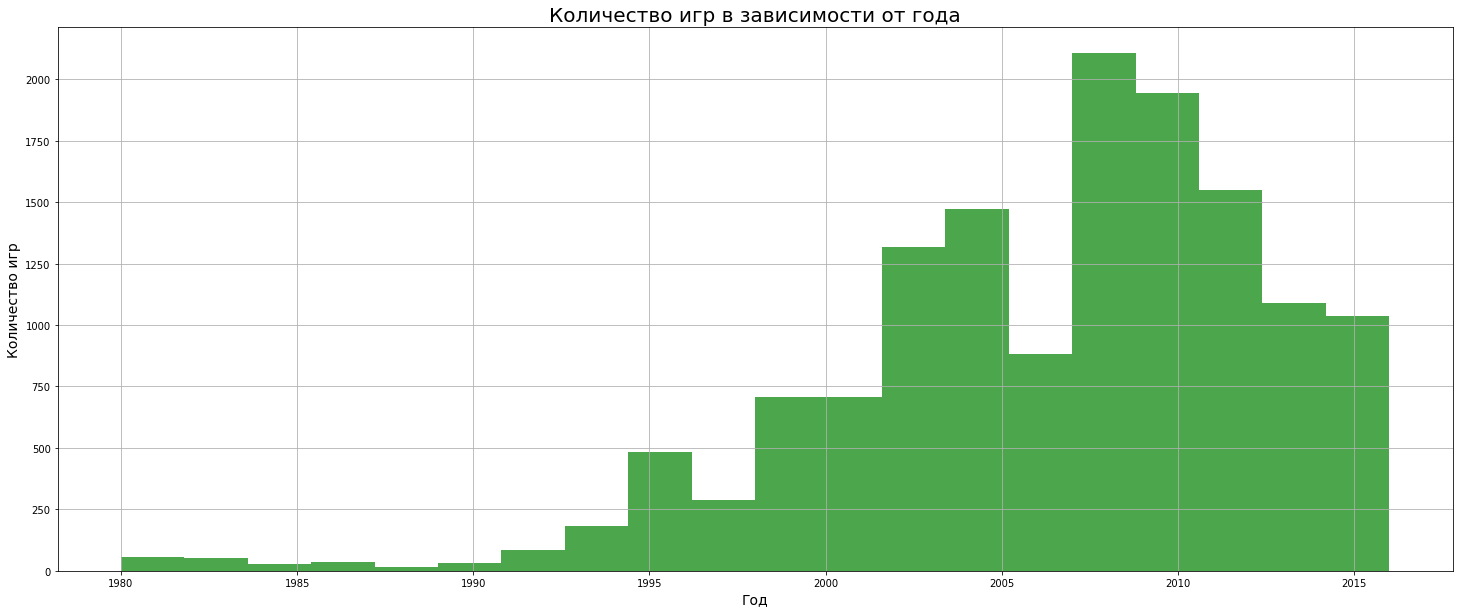

2008.0    1101
2009.0    1021
2007.0    1005
2010.0     924
2011.0     919
2006.0     882
2005.0     818
2003.0     680
2004.0     655
2002.0     637
Name: year_of_release, dtype: int64

In [13]:
#Строим гистограмму 
data['year_of_release'].plot(y = 'year_of_release', kind = 'hist', bins = 20, grid = True, \
figsize = (25, 10), color = 'g', alpha = 0.7,  title = 'year_of_release');
plt.xlabel("Год", fontsize = 14)
plt.ylabel("Количество игр", fontsize = 14)
plt.title(r'Количество игр в зависимости от года', fontsize = 20)
plt.show()
data['year_of_release'].value_counts().head(10)

    Большая часть выпуска игр пришлась на 2008 год - 1427 игр. Игры начали выпускаться на платформе в 1980 году, после чего пошел рост выхода игр до 2009 года, далее производство пошло на спад.


**Исследуем как менялись продажи по платформам**

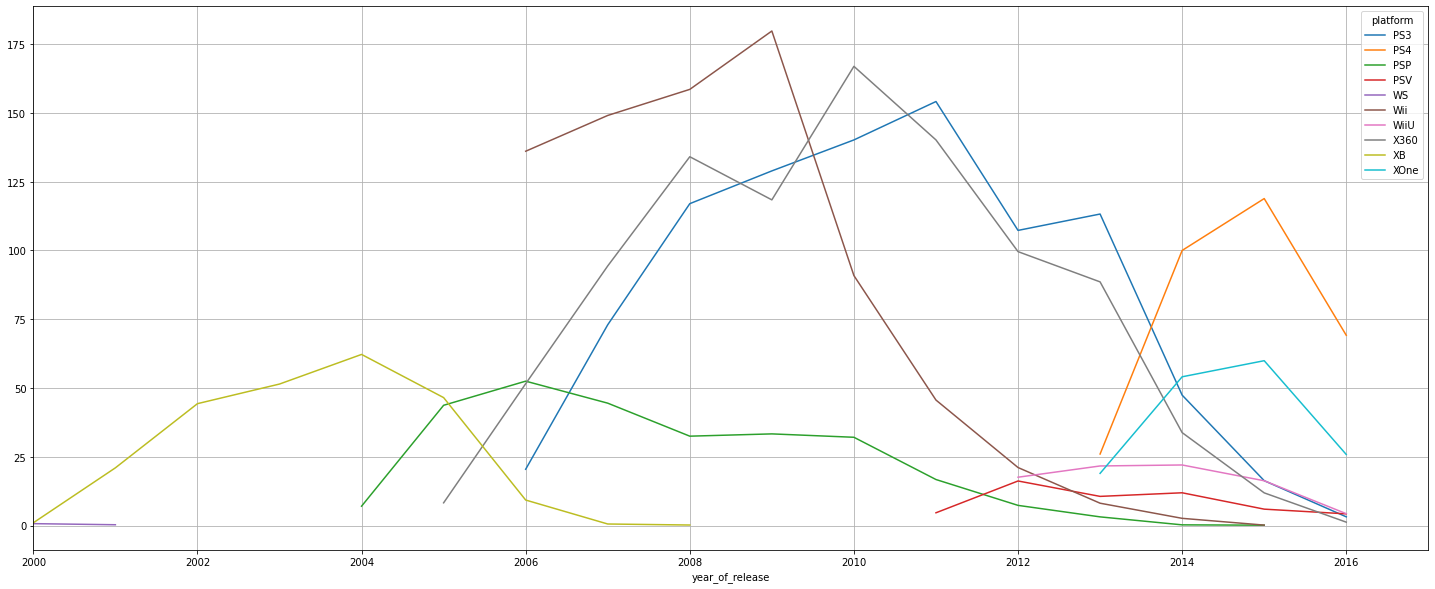

In [14]:
top = data.query('year_of_release > 2000').groupby('platform')['sales'].sum().tail(10).sort_values(ascending = False).index
top = data.query('platform in @top').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales',\
aggfunc = 'sum')
top.plot(xlim = (2000, 2017), figsize  = (25, 10), grid = True);


    С помощью группировки выявила платформы с наибольшими продажами. Применила метод отрезка и сводных таблиц, по году и платформам с наибольшими продажами. 
    С 2004 по 2006 года появились сразу 4 новые платформы, которые имели наиболее высокие продажи и пользовались большой популярностью примерно 4-6 лет. 
    С приходом новых платформ в 2013 году , продажи описанных выше платформ пошли на спад, новые платформы начали набирать популярность.
    Именно период с 2013 года и будем считать актуальным.


**Акутальный период**

    Выделим актуальный период с 2013 по 2016

In [15]:
#Создаем таблицу с данными за актуальный период
period = data.query('2013 <= year_of_release <= 2016')
period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


**Исследуем прибыльность платформ за актуальный период**

    Выясним какие платформы лидируют по продажам, растут или падают.

In [16]:
#Создаем таблицу с продажами по годам каждой платформы
period_actual = period.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum')
period_actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.32,0.97,12.38,113.24,25.99,3.14,10.59,8.11,21.65,88.57,18.96
2014.0,43.07,NaN,13.25,47.40,100.00,0.24,11.90,2.61,22.01,33.77,54.07
2015.0,27.21,NaN,8.49,16.30,118.86,0.12,5.95,0.15,16.27,11.87,59.92
2016.0,15.10,NaN,5.22,3.16,69.15,NaN,4.24,NaN,4.30,1.22,25.82


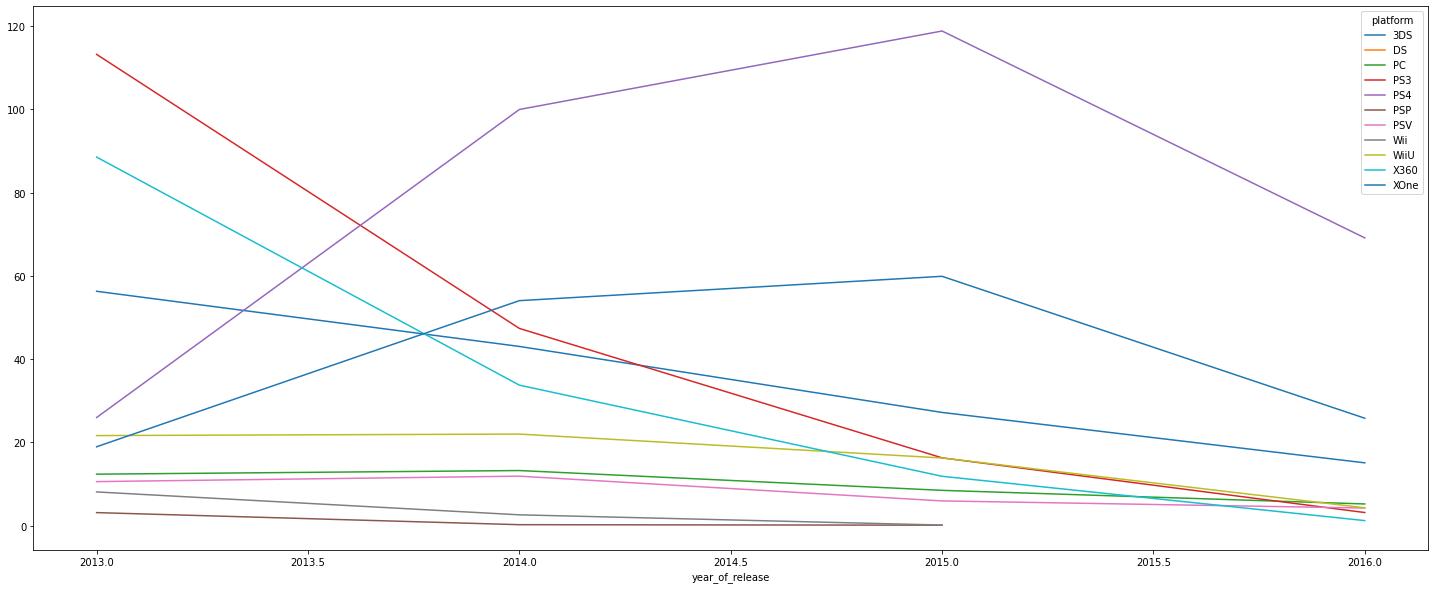

In [17]:
period_actual.plot(figsize = (25, 10));

    По полученному графику можем сказать, что:

        -Наиболее прибыльные платформы - PS4, XOne. Пик - 2015 год.
    
        -Прослеживается сильная корреляция между PS3,X360 и PS4, XOne, так как с приходом нового поколения аналогичных платформ, старые потеряли свою актуальность.


In [18]:
#Создаем таблицу с годом и платформой в индексе, для построения боксплотов
actual = period.pivot_table(index = ['year_of_release', 'platform'], values = 'sales', aggfunc = 'sum')
actual

sales
year_of_release platform        
2013.0          3DS        56.32
                DS          0.97
                PC         12.38
                PS3       113.24
                PS4        25.99
                PSP         3.14
                PSV        10.59
                Wii         8.11
                WiiU       21.65
                X360       88.57
                XOne       18.96
2014.0          3DS        43.07
                PC         13.25
                PS3        47.40
                PS4       100.00
                PSP         0.24
                PSV        11.90
                Wii         2.61
                WiiU       22.01
                X360       33.77
                XOne       54.07
2015.0          3DS        27.21
                PC          8.49
                PS3        16.30
                PS4       118.86
                PSP         0.12
                PSV         5.95
                Wii         0.15
                WiiU       16.27
                X360       11.87
                XOne       59.92
2016.0          3DS        15.10
                PC          5.22
                PS3         3.16
                PS4        69.15
                PSV         4.24
                WiiU        4.30
                X360        1.22
                XOne       25.82

**Диаграмма размаха**

     Построим ящик с усами для каждой платформы за актуальный период.

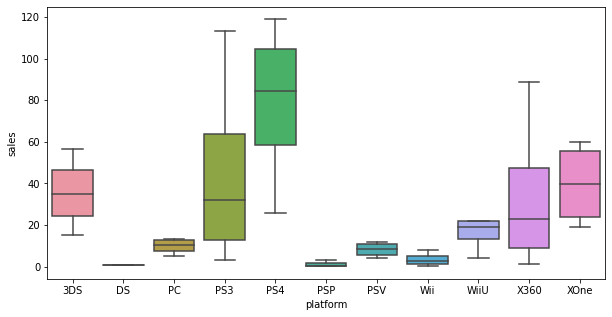

In [19]:
#Постороение боксплотов на одном графике
fig, ax = plt.subplots(figsize = (10,5));
sns.boxplot(x ='platform', y = 'sales', data = actual.reset_index(), ax=ax);

    Больше всего прибыли у PS4, следом идет ее предшественник PS3. Так же большую выручку имеют X360,XOne,3DS.

    Наиболее равномерны распределены знаечения у 3DS и XOne.

**Корреляция отзывов и продаж** 

    Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

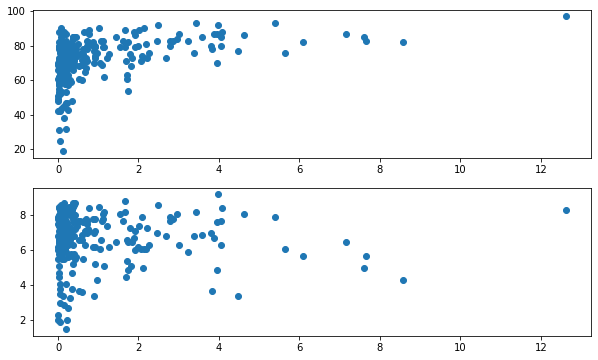

Корреляция между отзывами пользователей и продажами: -0.031957110204556376
Корреляция между отзывами критиков и продажами: 0.4064685741971657


In [20]:
fig, (ax, ax1) = plt.subplots(2,1, figsize=(10, 6))
ax.scatter(y= 'critic_score', x = 'sales', data = period.query('platform == "PS4"'));
ax1.scatter(y= 'user_score', x = 'sales', data = period.query('platform == "PS4"'));
plt.show()
user_score_ps4 = period.query('platform == "PS4"')['user_score']
critic_score_ps4 = period.query('platform == "PS4"')['critic_score']
sales_ps4 = period.query('platform == "PS4"')['sales']
print('Корреляция между отзывами пользователей и продажами:', user_score_ps4.corr(sales_ps4))
print('Корреляция между отзывами критиков и продажами:',critic_score_ps4.corr(sales_ps4))

    Корреляция между отзывами критиков и продажами сильнее, чем между отзывами пользователей. Можем заметить , что они обратны друг другу, так как корреляция с между отзывами пользователей имеет отрицательное значение.
    Можем сделать вывод, что отзывы критиков имеют большее значение на продажи игр.

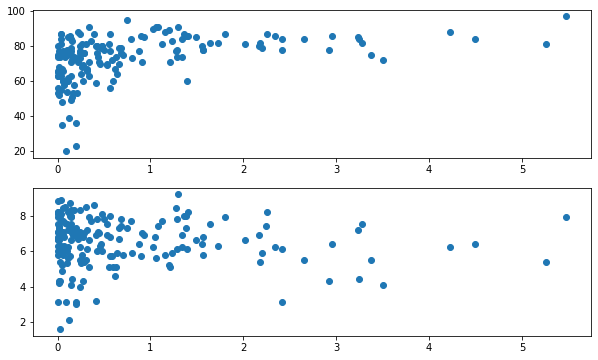

Корреляция между отзывами пользователей и продажами платформы XOne: -0.06892505328279414
Корреляция между отзывами критиков и продажами платформы XOne: 0.41215586820316974


In [21]:
#Проверим корреляцию на примере XOne
fig, (ax, ax1) = plt.subplots(2,1, figsize=(10, 6))
ax.scatter(y= 'critic_score', x = 'sales', data = period.query('platform == "XOne"'));
ax1.scatter(y= 'user_score', x = 'sales', data = period.query('platform == "XOne"'));
plt.show()
user_score_xone = period.query('platform == "XOne"')['user_score']
critic_score_xone = period.query('platform == "XOne"')['critic_score']
sales_xone = period.query('platform == "XOne"')['sales']
print('Корреляция между отзывами пользователей и продажами платформы XOne:', user_score_xone.corr(sales_xone))
print('Корреляция между отзывами критиков и продажами платформы XOne:',critic_score_xone.corr(sales_xone))

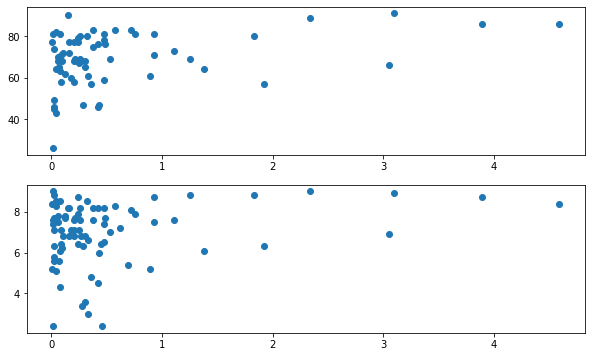

Корреляция между отзывами пользователей и продажами платформы 3DS: 0.24150411773563016
Корреляция между отзывами критиков и продажами платформы 3DS: 0.3392349287853147


In [22]:
#Проверим корреляцию на примере 3DS
fig, (ax, ax1) = plt.subplots(2,1, figsize=(10, 6))
ax.scatter(y= 'critic_score', x = 'sales', data = period.query('platform == "3DS"'));
ax1.scatter(y= 'user_score', x = 'sales', data = period.query('platform == "3DS"'));
plt.show()
user_score_3ds = period.query('platform == "3DS"')['user_score']
critic_score_3ds = period.query('platform == "3DS"')['critic_score']
sales_3ds = period.query('platform == "3DS"')['sales']
print('Корреляция между отзывами пользователей и продажами платформы 3DS:', user_score_3ds.corr(sales_3ds))
print('Корреляция между отзывами критиков и продажами платформы 3DS:',critic_score_3ds.corr(sales_3ds))

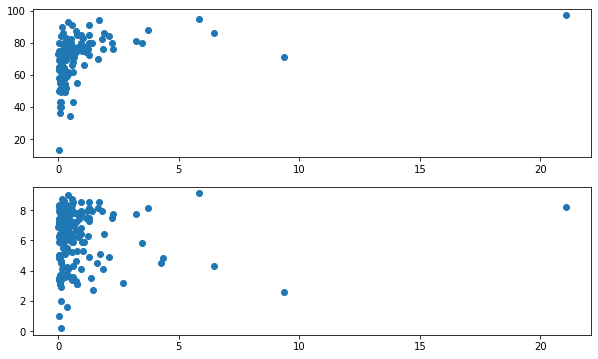

Корреляция между отзывами пользователей и продажами платформы PS3: 0.0023944027357566925
Корреляция между отзывами критиков и продажами платформы PS3: 0.33380663565061736


In [23]:
#Проверим корреляцию на примере PS3
fig, (ax, ax1) = plt.subplots(2,1, figsize=(10, 6))
ax.scatter(y= 'critic_score', x = 'sales', data = period.query('platform == "PS3"'));
ax1.scatter(y= 'user_score', x = 'sales', data = period.query('platform == "PS3"'));
plt.show()
user_score_ps3 = period.query('platform == "PS3"')['user_score']
critic_score_ps3 = period.query('platform == "PS3"')['critic_score']
sales_ps3 = period.query('platform == "PS3"')['sales']
print('Корреляция между отзывами пользователей и продажами платформы PS3:', user_score_ps3.corr(sales_ps3))
print('Корреляция между отзывами критиков и продажами платформы PS3:',critic_score_ps3.corr(sales_ps3))

**Исследуем игры по жанрам**

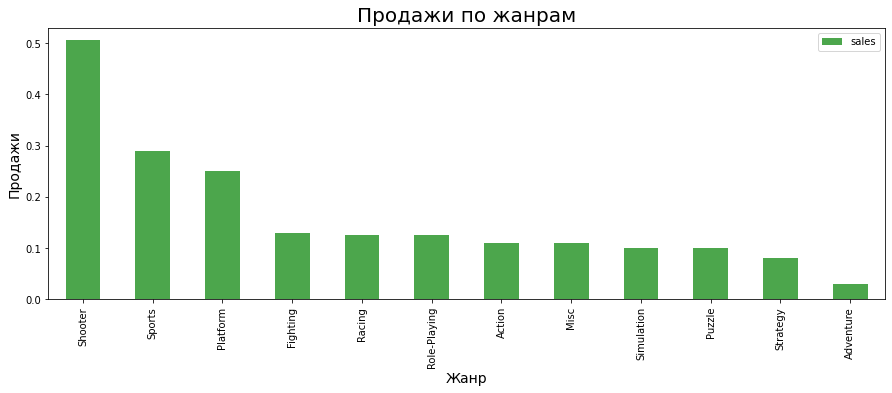

In [24]:
period_genre = period.pivot_table(index = 'genre', values = 'sales', aggfunc = 'median')\
.reset_index().sort_values(by = 'sales', ascending = False)
period_genre.plot.bar(x = 'genre', y = 'sales', figsize = (15,5), color = 'g', alpha = 0.7);
plt.xlabel("Жанр", fontsize = 14);
plt.ylabel("Продажи", fontsize = 14);
plt.title(r'Продажи по жанрам', fontsize = 20);

    Экшн и шутеры сильно выделяются на фоне остальных жанров, так как имеют самые высокие показатели продаж. Наименее популярные - пазлы, стратегии.

**ПОРТРЕТ КАЖДОГО ПОЛЬЗОВАТЕЛЯ**

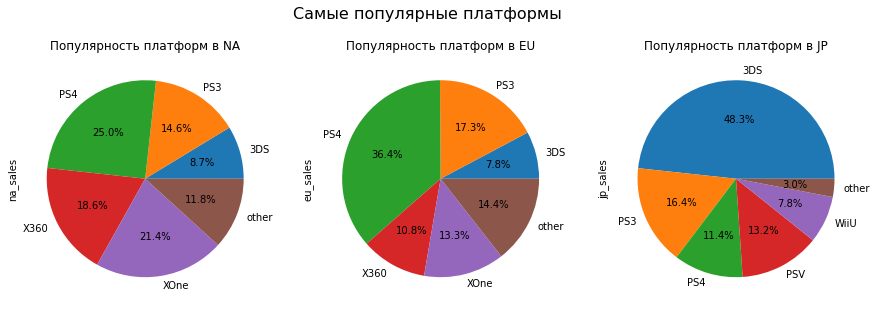

In [25]:
plt.subplots(figsize=(15, 5))
regions = ['na', 'eu', 'jp']
plt.suptitle('Самые популярные платформы', fontsize = 16)
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region)
    current = period.groupby('platform').agg({column_name: 'sum'}).reset_index()
    current['rank'] = current[column_name].rank(method = 'dense', ascending = False)
    current.loc[current['rank'] > 5, 'platform'] = 'other'
    current = current.groupby('platform').agg({column_name: 'sum'})
    current.plot(y=column_name, kind = 'pie', autopct='%.1f%%', legend = False, ax = plt.subplot(1, len(regions), i + 1))
    plt.title('Популярность платформ в {}'.format(region.upper()))

    В Северной Америке и Европе предпочтение отдают PS4, в Японии соверешенно другие показатели, больший процент занимает - 3DS, в то время как в Северной Америке и Европе эта платформа имеет очень малый процент. Можем объяснить это тем, что Япония - страна производитель 3DS, так же возможно эта платформа там более доступна, поэтому скорее всего она и популярна там.


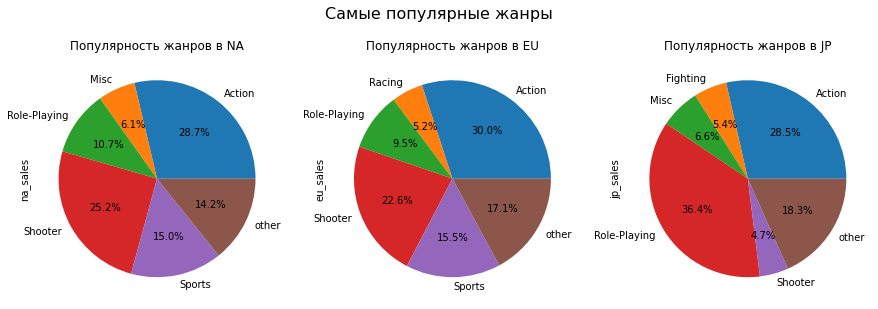

In [26]:
plt.subplots(figsize=(15, 5))
regions = ['na', 'eu', 'jp']
plt.suptitle('Самые популярные жанры', fontsize = 16)
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region)
    current = period.groupby('genre').agg({column_name: 'sum'}).reset_index()
    current['rank'] = current[column_name].rank(method = 'dense', ascending = False)
    current.loc[current['rank'] > 5, 'genre'] = 'other'
    current = current.groupby('genre').agg({column_name: 'sum'})
    current.plot(y=column_name, kind = 'pie', autopct='%.1f%%', legend = False, ax = plt.subplot(1, len(regions), i + 1))
    plt.title('Популярность жанров в {}'.format(region.upper()))

    Немного разнятся показатели Северной Америки и Европы с Японией.
    В Америке и Европе больше играют в экшн, шутеры и спортивные игры.
    В Японии наиболее популярные жанры - ролевые игры и экшн. Шутеры в Японии имеют очень низкий процент.

In [27]:
period['rating'].value_counts(dropna=False)

NaN     964
M       365
T       316
E       262
E10+    218
Name: rating, dtype: int64

In [28]:
#Заменим пропуски на 'unknwn'
period['rating'] = period['rating'].fillna('unknwn')

In [29]:
#Создаем таблицу с годом и платформой в индексе, для построения боксплотов
rating_pivot_table = period.pivot_table(index = 'rating', values = ['na_sales','jp_sales','eu_sales'], aggfunc = 'median')\
.sort_values(by=['na_sales','jp_sales','eu_sales'], ascending=False)
rating_pivot_table

,eu_sales,jp_sales,na_sales
rating,,,
E10+,0.12,0.00,0.16
M,0.13,0.00,0.14
E,0.08,0.00,0.08
T,0.04,0.01,0.05
unknwn,0.00,0.02,0.00


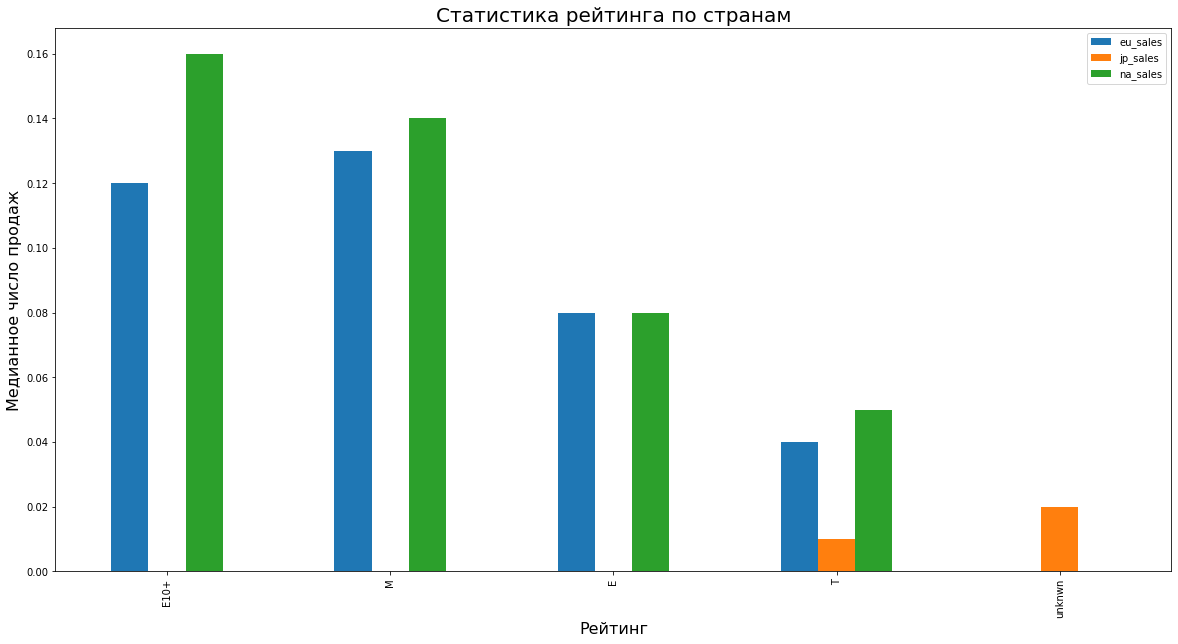

In [30]:
rating_pivot_table.plot(kind = 'bar', figsize = (20,10));
plt.title('Статистика рейтинга по странам', fontsize = 20);
plt.ylabel('Медианное число продаж', fontsize = 16);
plt.xlabel('Рейтинг', fontsize = 16);


    Рейтинг ESRB больше всего влияет на продажи в Северной Америке, так же в Европе рейтинг ESRB тоже имееет большое значение. 
    В Японии рейтинг имеет не такую силу, по боксплотам можем заметить, что в Японии продажи в несколько раз ниже на основе данного рейтинга.

**ПРОВЕРКА ГИПОТЕЗ**

   **Нулевая гипотеза**
   
        Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

   **Альтернативная гипотеза** 
   
        Средние пользовательские рейтинги платформ Xbox One и PC разные

In [31]:
XOne_mean = period.query('platform == "XOne"')['user_score'].dropna()
PC_mean = period.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(XOne_mean, PC_mean, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве рейтинга платформ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


    Это двусторонняя гипотеза, так как мы проверяем значения в обе стороны, это не зависящие друг от друга выборки, поэтому мы можем применить т-тест st.ttest_ind.
    Т-тест показал, что средние пользовательские рейтинги платформ Xbox One и PC равные.
    

**Нулевая гипотеза** 

    Средние пользовательские рейтинги жанров Action и Sports равные.

**Альтернативная гипотеза**

    Средние пользовательские рейтинги жанров Action и Sports разные.

In [32]:
action_mean = period.query('genre == "Action"')['user_score'].dropna()
sports_mean = period.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(action_mean, sports_mean, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве рейтинга жанров')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу о равенстве рейтинга жанров


    Это так же двусторонняя гипотеза двух не зависящих друг от друга выборок, поэтому применяем st.ttest_ind.
    Тест показал, что средние пользовательские рейтинги жанров Action и Sports разные.

# ВЫВОД

**Объект исследования** - интернет-магазин компьютерных игр "Стримчик".

**Ход исследования**

    Предобработка данных:
    
    -Проверила наличие пропусков, удалила две строки, имеющие малое количество данных.
    
    -Проверила дубликаты - в данной таблице, дубликаты отсутствуют.
    
    -Добавила в таблицу столбец с общими продажами.
    
    Исследовательский анализ:
    
    -Визуализировала количество выпущенных игр по годам.
    
    -С помощью графика отследила как менялись продажи каждой платформы по годам.
    
    -Выяивила актуальный период.
    
    -Построила ящики с усами для каждой платформы за актуальный период.
    
    -Исследовала корреляцию отзывов и продаж.
    
    -При помощи гистограммы выявила самые прибыльные жанры.
    
    -Составила портрет каждого пользователя по жанрам и платформам.
    
    Проверка гипотез:
    
    Проверила две гипотезы:
    
    1.Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC.
        
        -Отвергнуть эту гипотезу не получилось, так что можем предположить, что средние действительно равны.
    
    2.Равны ли средние пользовательские рейтинги жанров Action и Sports.
    
        -Отвергнули эту гипотезу, тест показал, что средние двух анров разные.
    
**Вывод**


    Из исследования можно сделать следующие выводы:
    Количество игр начинало расти с 1990 года по 2008 год, после чего произошел спад разработки игр.Самыми поплуярными платформами за весь период были - PS3, PS4, PSP, PSV, WS, Wii, WiiU, X360, XB, XOne. Около десяти лет живут игровые приставки, после чего поялвяются новые версии, либо приставки теряют свою актуальность. Пик своей популярности сохраняют 4-6    лет. 
    Выявила актуальный период с 2013 года по 2016, в этот период самые популярные приставки - PS4, XOne. Пик - 2015 год. Очень плавно идет на спад приставка 3DS, имеющая большую поплуярность в Японии.
    Отследила корреляцию между отзывами и продажами. Оценки пользователей либо не имеют корреляции с продажами, либо имеют слабую положительную корреляцию.
    Оценки критиков имеют слабую положительную корреляцию, это может значить, что пользователи иногда обращают внимание на оценки, но делают это не всегда.
    Самый прибыльный жанр - шутер. На втором месте расположились спортивные игры. 
    Самый неприбыльный жанр - приключения.

    Портреты пользователей:

    Северная Америка 
        -Самые популярные жанры - шутер, экшн, спортивные игры
        -Самые популярные платформы - PS4, XOne, X360
        -Наибольшие продажы имеют игры с рейтингом Е10+, что означает(«Everyone 10 and older») — «Для всех от 10 лет и      старше»
    
    Европа
        -Самые популярные жанры - шутер, экшн, спортивные игры
        -Самые популярные платформы - PS4, XOne, X360
        -Наибольшие продажы имеют игры с рейтингом М, что означает(«Mature») — «Для взрослых»
    
    Япония
        -Самые популярные жанры - экшн и сетевые игры
        -Самые популярные платформы - 3DS, PS3, PS4
        -Наибольшие продажы имеют игры без рейтинга ESRB.
    
    Рынок Японии сильно разнится с рынками Европы и Северной Америки, скорее это из-за того, что Япония больше продвигает   технологии своей страны, что и считается общепринятым для ее населения.

    Для прогноза будем брать данные за 2015 - 2016 года, так как за 2016 данные неполные, поэтому захватим и 2015. Более ранние года брать не будем, так как они уже могут потерять свою актульность в будущем году.
    Наиболее прибыльными играми будут в жанре шутер и спортивные, для платформы PS4 с рейтингом "Е10+". После них по прибыли будут игры для платформы XOne, имеющие рейтинг "М".